In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/BU Athletics Data 22-23.csv')

In [11]:
df.dropna(subset=['Last Cumulative BU GPA'], inplace = True)

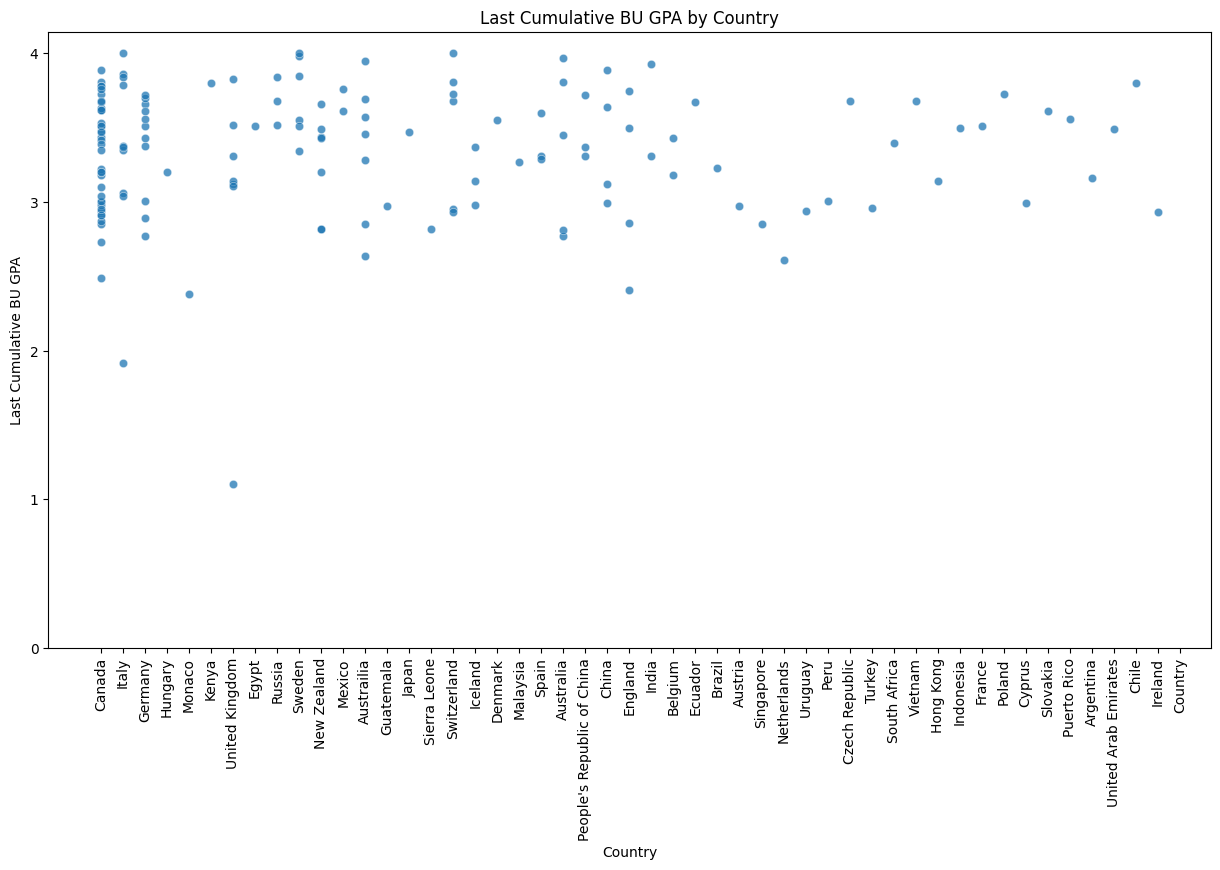

In [14]:
df['Last Cumulative BU GPA'] = pd.to_numeric(df['Last Cumulative BU GPA'], errors='coerce')

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Country', y='Last Cumulative BU GPA', alpha=0.5)
plt.xticks(rotation=90) 
plt.title("Last Cumulative BU GPA by Country")
plt.xlabel("Country")
plt.ylabel("Last Cumulative BU GPA")
plt.yticks(range(0, int(df['Last Cumulative BU GPA'].max()) + 1, 1))

plt.show()


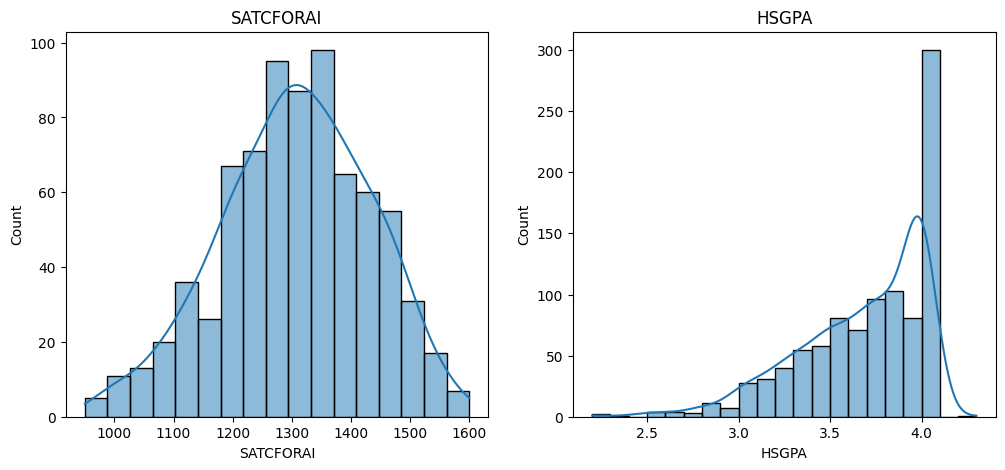

In [4]:
plt.figure(figsize=(12, 5))


# Distribution of SATCFORAI 
plt.subplot(1, 2, 1)
sns.histplot(df['SATCFORAI'], kde = True)
plt.title('SATCFORAI')

# Distribution of HSGPA 
plt.subplot(1, 2, 2)
sns.histplot(df['HSGPA'], kde = True)
plt.title('HSGPA')

plt.show()

In [5]:
df['HSGPA'].fillna(df['HSGPA'].mean(), inplace = True)

In [6]:
# Splitting to students taken SAT vs not

sat_idx = df[df['SATCFORAI'].isna()].index

sat_df = df.loc[sat_idx]
nonsat_df = df.drop(sat_idx)


In [7]:
sat_df = sat_df[['HSGPA', 'Cumulative GPA-22nd Sem']]
nonsat_df = nonsat_df[['HSGPA', 'Cumulative GPA-22nd Sem']]

In [8]:
sat_df = sat_df.copy()
nonsat_df = nonsat_df.copy()

In [9]:
bin_size = 0.5

sat_df.loc[:, 'bin_HSGPA'] = (np.floor(sat_df['HSGPA'] / bin_size)) * bin_size
nonsat_df.loc[:, 'bin_HSGPA'] = (np.floor(nonsat_df['HSGPA'] / bin_size)) * bin_size



In [10]:
def visualize_gpa_dist(df):

    
    start = 2
    end = 4
    step = 0.5
    
    values = [i for i in np.arange(start, end + step, step)]
    
    fig, axs = plt.subplots(int(np.ceil(len(values)/2)), 2, figsize=(16, 6))
    
    for i in range(len(values)):
    
        x = values[i]
    
        gpa_vals = df[df['bin_HSGPA'] == x]['Cumulative GPA-22nd Sem']
    
        if i%2 == 0:
            ax = axs[int(i/2), 0]
        else:
            ax=axs[int(i/2), 1]
    
    
        if x == 4: 
            ax.set_title(f'HSGPA : {x}')
        else:
            ax.set_title(f'HSGPA : {x} to {x+0.5}')
            
        ax.set_xlabel('Cumulative College GPA')
        ax.set_ylabel('Frequency')
        
        plt.tight_layout()
        
        sns.histplot(gpa_vals, ax = ax)



### GPA Distributions for each High School GPA bucket

#### Students taken SAT

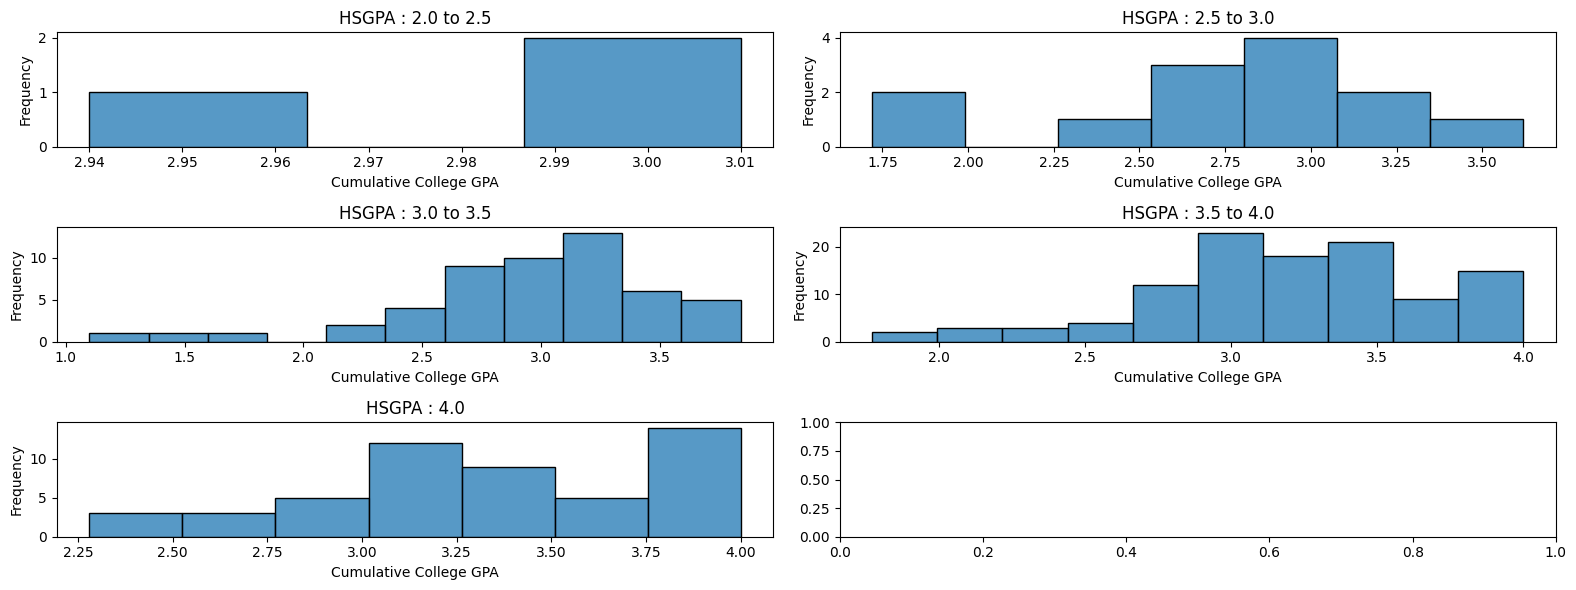

In [11]:
visualize_gpa_dist(sat_df)

 

#### NON SAT Students

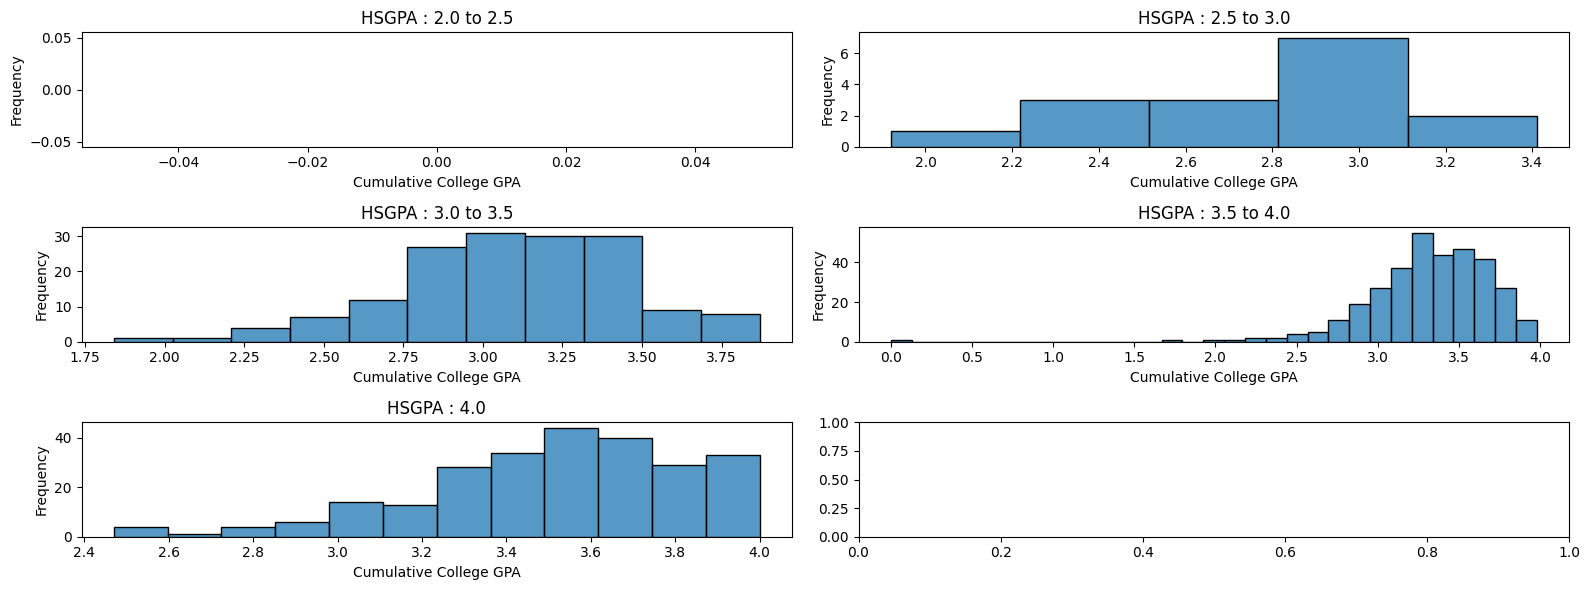

In [12]:

visualize_gpa_dist(nonsat_df)


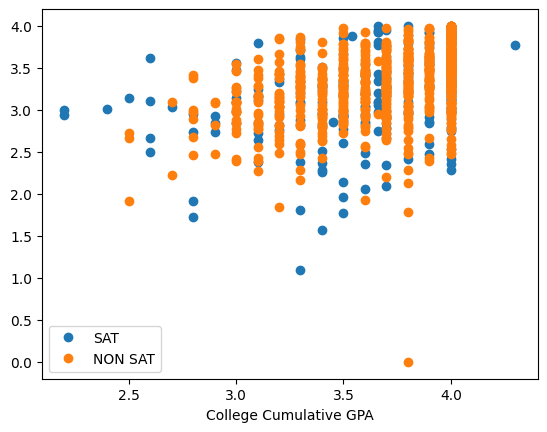

In [13]:
plt.plot(sat_df['HSGPA'], sat_df['Cumulative GPA-22nd Sem'], 'o', label = 'SAT')
plt.plot(nonsat_df['HSGPA'], nonsat_df['Cumulative GPA-22nd Sem'], 'o', label = 'NON SAT')
plt.xlabel('High School GPA')
plt.xlabel('College Cumulative GPA')


plt.legend()
plt.savefig('Scatterplot_hsgpa_gpa.png')

plt.show()


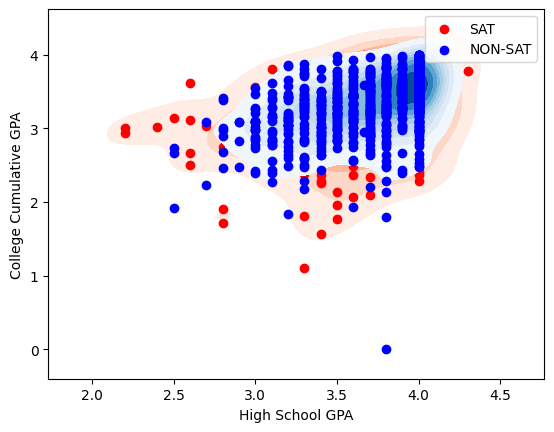

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for SAT data
sns.kdeplot(x=sat_df['HSGPA'], y=sat_df['Cumulative GPA-22nd Sem'], 
            cmap="Reds", fill=True, alpha=1)
plt.scatter(sat_df['HSGPA'], sat_df['Cumulative GPA-22nd Sem'], 
            color='red', label='SAT')

# Scatter plot for NON-SAT data
sns.kdeplot(x=nonsat_df['HSGPA'], y=nonsat_df['Cumulative GPA-22nd Sem'], 
            cmap="Blues", fill=True, alpha=1)
plt.scatter(nonsat_df['HSGPA'], nonsat_df['Cumulative GPA-22nd Sem'], 
            color='blue', label='NON-SAT')

# Labels and legend
plt.xlabel('High School GPA')
plt.ylabel('College Cumulative GPA')

plt.legend()

# Save the figure
plt.savefig('Scatterplot_hsgpa_gpa_density.png')

plt.show()

In the scatter plot depicting the relationship between HSGPA and GPA, we observe that the performance of a few students who took SATs is unpredictable. The bottom blue points indicate that some SAT takers scored 3-4 GPAs in high school but only achieved a GPA of 1-2.5 in college. These kinds of outliers are less seen among non-SAT students